In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
temperatures = pd.read_csv("CREMP_Temperatures_2023.csv")

In [6]:
temperatures.head()

,OID_,SiteID,Site_name,Year,Month,Day,Time,TempC,TempF
0,1,10,Rattlesnake,2020,6,12,11.0,29.59,85.26
1,2,10,Rattlesnake,2020,6,12,12.0,29.76,85.57
2,3,10,Rattlesnake,2020,6,12,13.0,29.81,85.66
3,4,10,Rattlesnake,2020,6,12,14.0,30.19,86.34
4,5,10,Rattlesnake,2020,6,12,15.0,30.34,86.61


In [8]:
temperatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105020 entries, 0 to 5105019
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   OID_       int64  
 1   SiteID     int64  
 2   Site_name  object 
 3   Year       int64  
 4   Month      int64  
 5   Day        int64  
 6   Time       float64
 7   TempC      float64
 8   TempF      float64
dtypes: float64(3), int64(5), object(1)
memory usage: 350.5+ MB


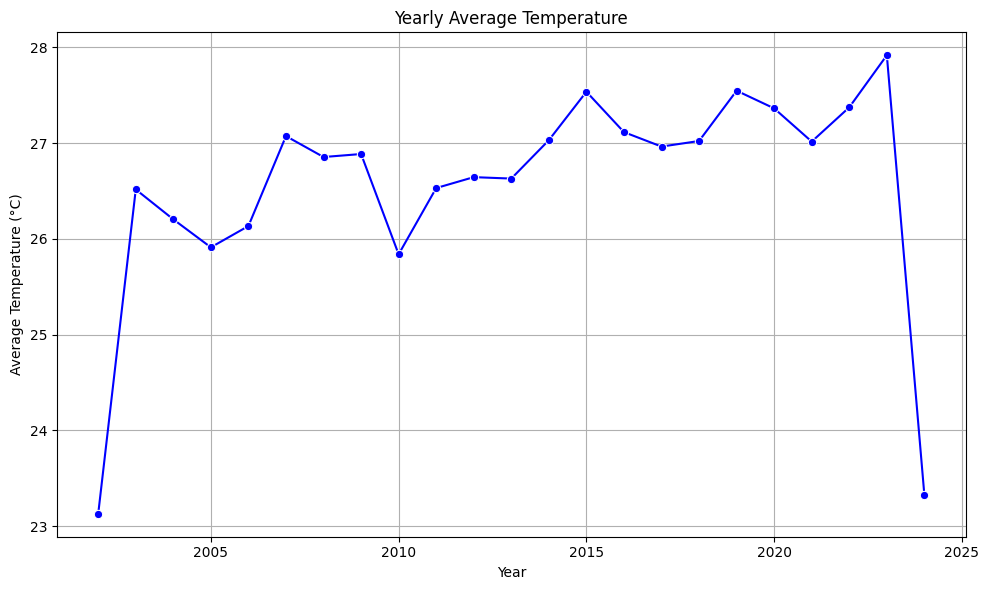

In [10]:
# Calculate yearly average temperature in Celsius
temp_yearly = temperatures.groupby('Year')['TempC'].mean()

# Plot yearly temperature trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=temp_yearly.index, y=temp_yearly.values, marker='o', color='b')
plt.title("Yearly Average Temperature")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

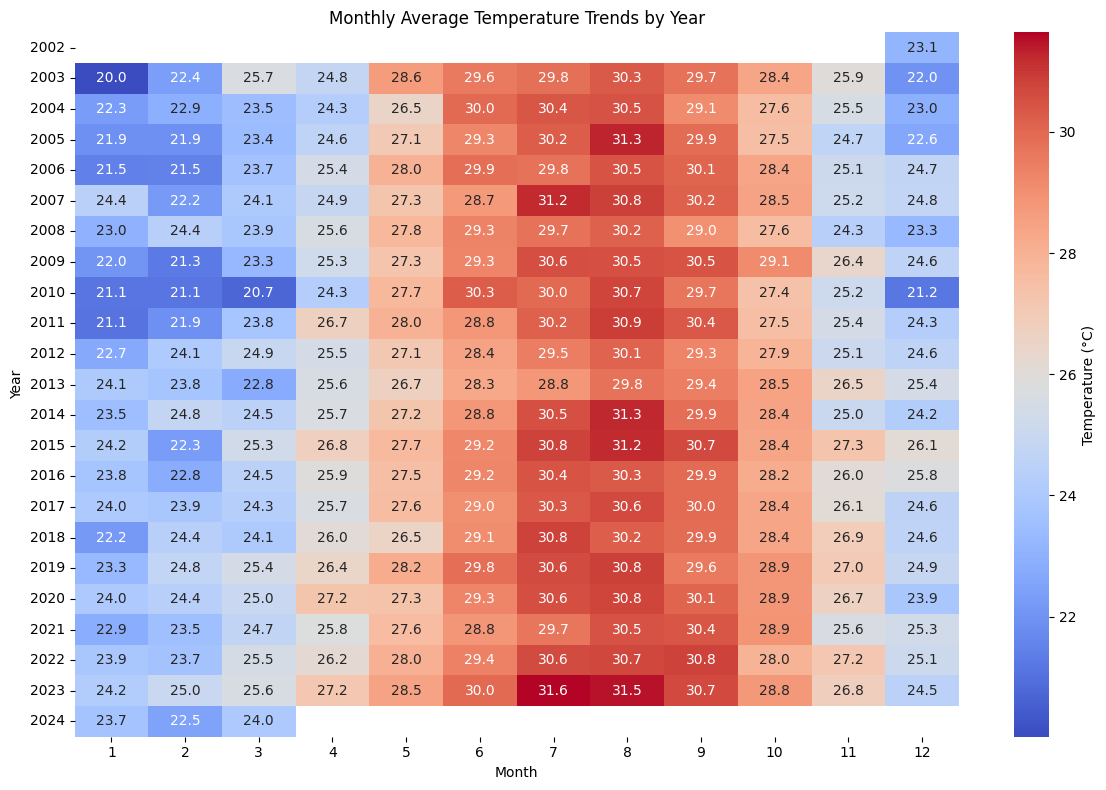

In [12]:
# Calculate monthly average temperature in Celsius
temp_monthly = temperatures.groupby(['Year', 'Month'])['TempC'].mean().unstack()

# Plot monthly temperature trend for each year
plt.figure(figsize=(12, 8))
sns.heatmap(temp_monthly, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Temperature (°C)'})
plt.title("Monthly Average Temperature Trends by Year")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

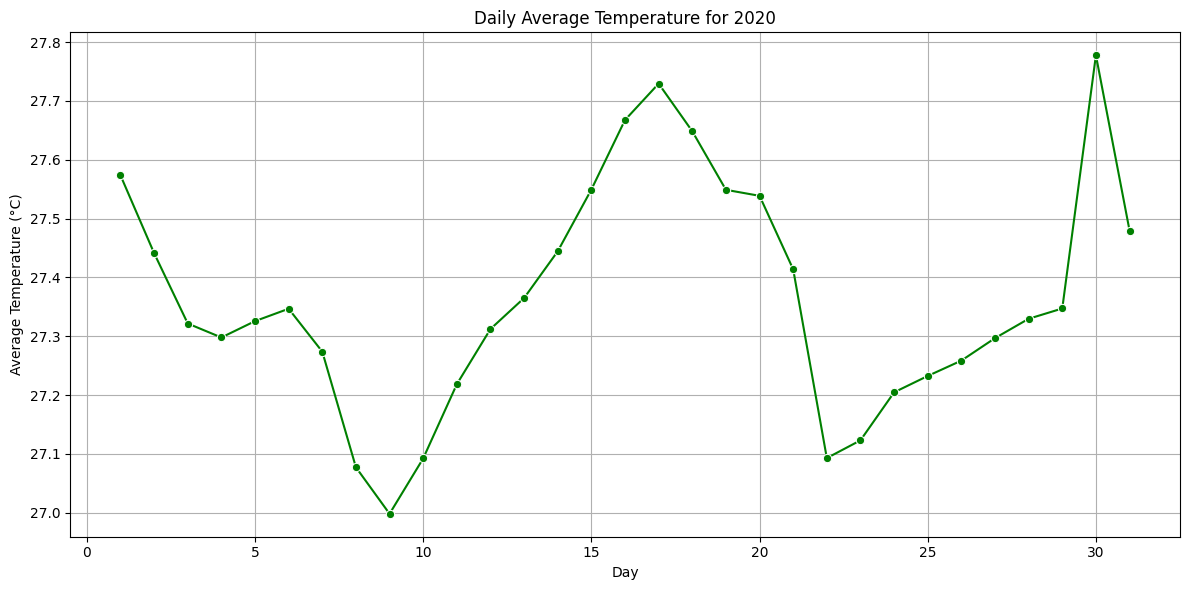

In [14]:
# Choose a specific year, e.g., 2020
temp_daily_2020 = temperatures[temperatures['Year'] == 2020].groupby('Day')['TempC'].mean()

# Plot daily temperature trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_daily_2020.index, y=temp_daily_2020.values, marker='o', color='g')
plt.title("Daily Average Temperature for 2020")
plt.xlabel("Day")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()

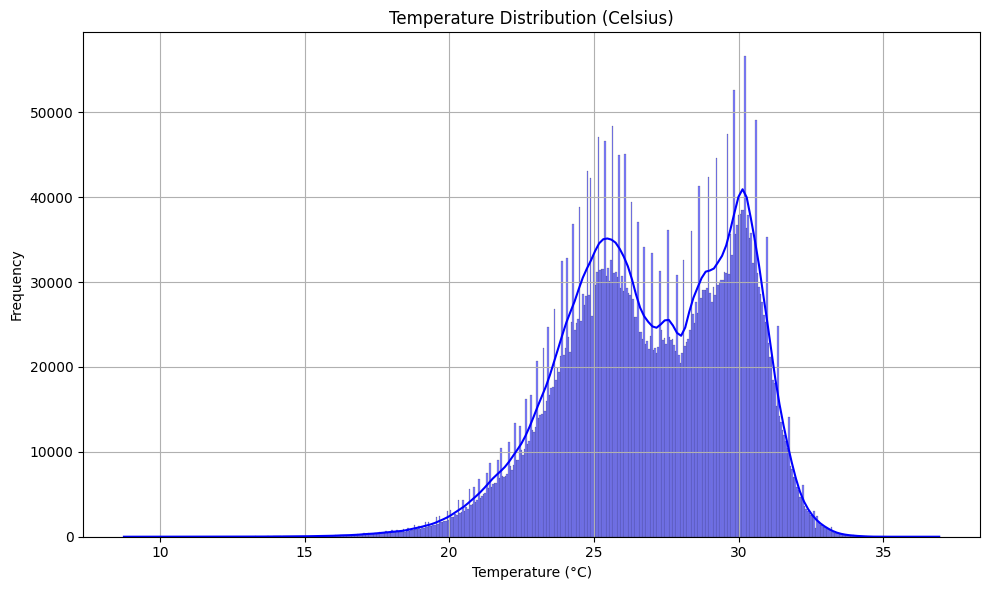

In [16]:
# Histogram of temperature distribution in Celsius
plt.figure(figsize=(10, 6))
sns.histplot(temperatures['TempC'], kde=True, color='b')
plt.title("Temperature Distribution (Celsius)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

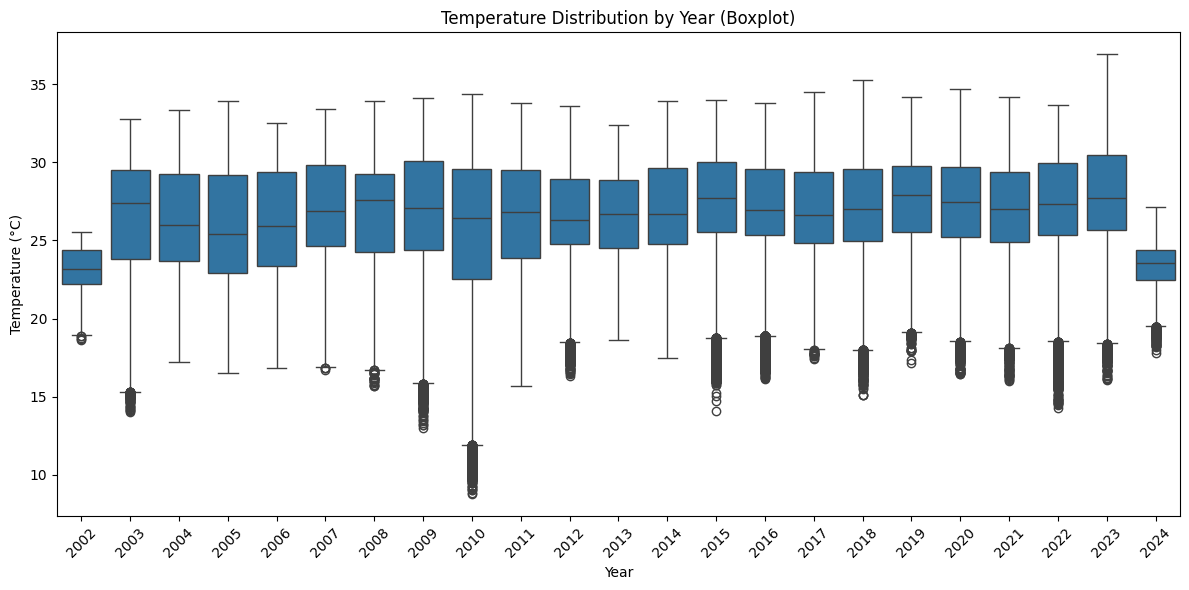

In [18]:
# Boxplot to check for outliers in temperatures by year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='TempC', data=temperatures)
plt.title("Temperature Distribution by Year (Boxplot)")
plt.xlabel("Year")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\yunus\AppData\Local\Temp\ipykernel_9188\2418862790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp_by_site.index, y=temp_by_site.values, palette="viridis")


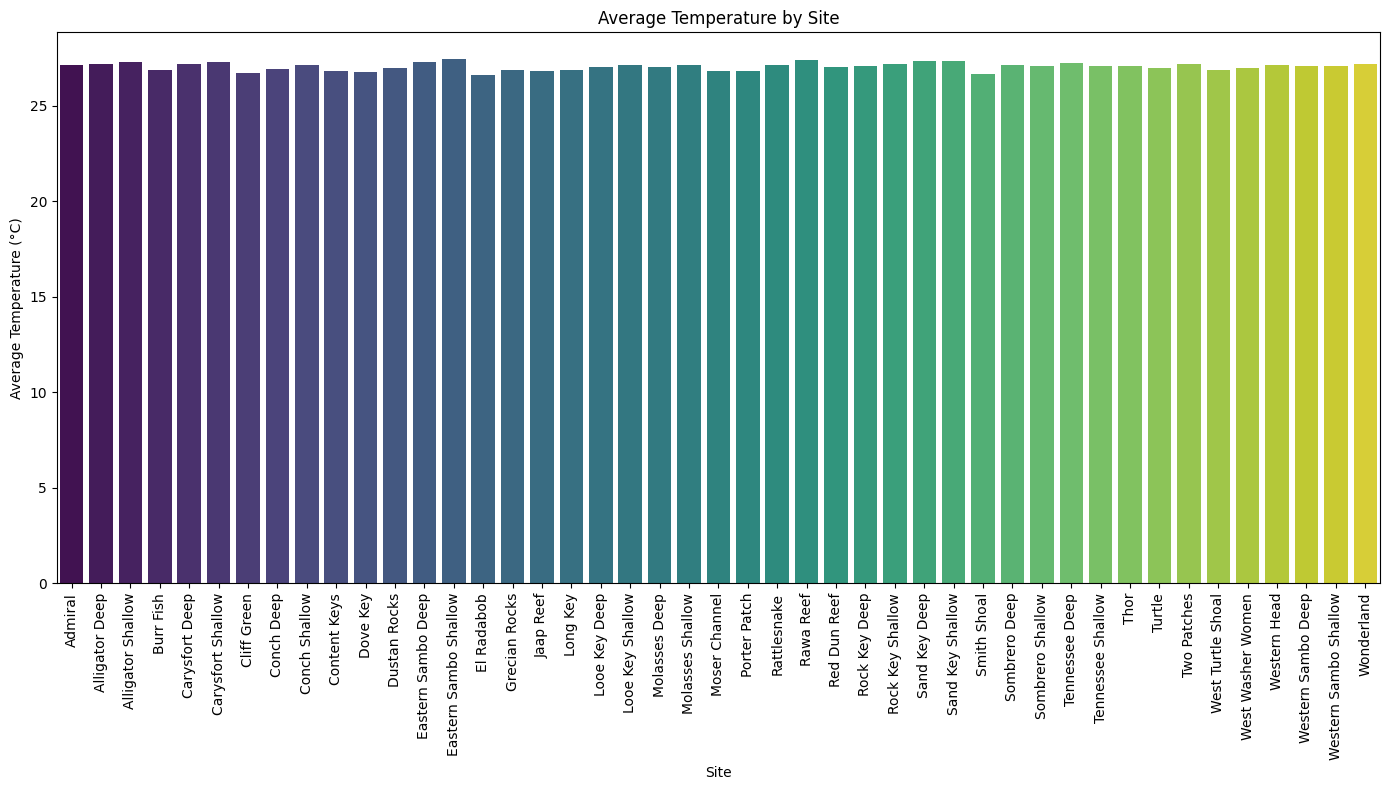

In [20]:
# Calculate average temperature for each site
temp_by_site = temperatures.groupby('Site_name')['TempC'].mean()

# Plot temperature by site
plt.figure(figsize=(14, 8))
sns.barplot(x=temp_by_site.index, y=temp_by_site.values, palette="viridis")
plt.title("Average Temperature by Site")
plt.xlabel("Site")
plt.ylabel("Average Temperature (°C)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

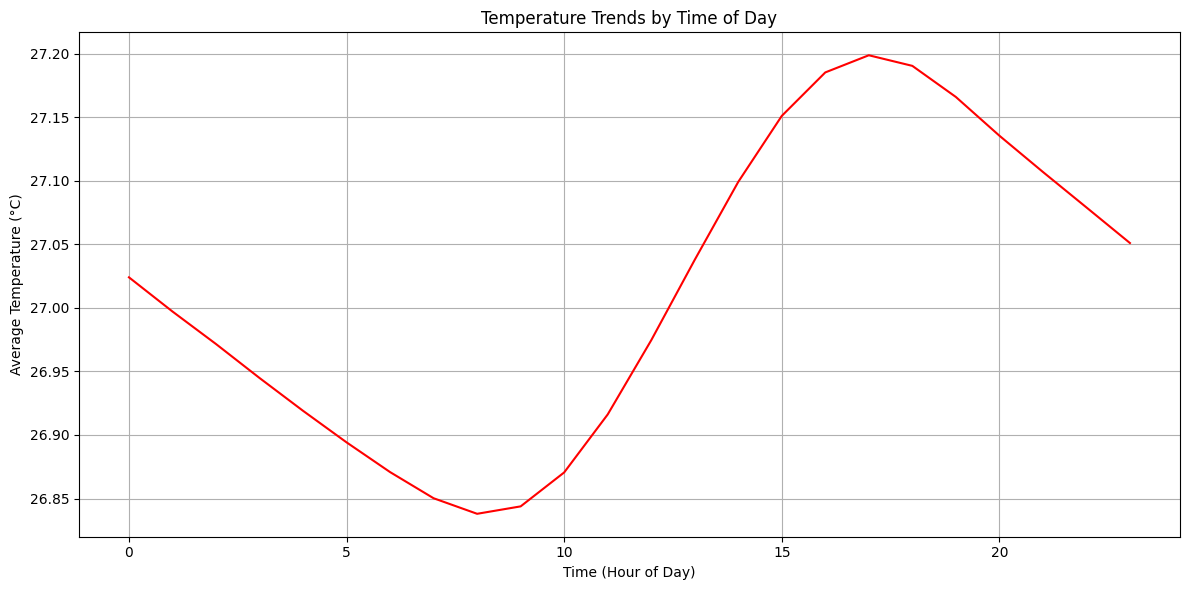

In [22]:
# Group by time of day (e.g., hourly) and calculate average temperature
temp_by_time = temperatures.groupby('Time')['TempC'].mean()

# Plot time-of-day temperature trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=temp_by_time.index, y=temp_by_time.values, color='r')
plt.title("Temperature Trends by Time of Day")
plt.xlabel("Time (Hour of Day)")
plt.ylabel("Average Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()